In [2]:
import pandas as pd
import numpy as np 
import seaborn as sn

In [4]:
side = "side_effect_data 1.xlsx"

In [6]:
data = pd.read_excel(side)
data.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [14]:
data.shape

(2357, 19)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

Veriye ait bilgilere baktığımızda 4 tane zaman serisi içersen tarih değişkeni, 2 tane ondalık sayı içerek değişken, 1 tane tam sayı içeren değişken ve 12 tane kategorik değişken bulunmakta. 

In [19]:
data.isnull().sum()

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

Her bir değişken için eksik gözlem sayısına baktığımızda bazı değişkenlerde çok fazla eksik gözlem bulunduğunu görüyoruz.

In [22]:
missing_values = data.isnull().mean() * 100
print(missing_values)

Kullanici_id                         0.000000
Cinsiyet                            33.008061
Dogum_Tarihi                         0.000000
Uyruk                                0.000000
Il                                   9.630887
Ilac_Adi                             0.000000
Ilac_Baslangic_Tarihi                0.000000
Ilac_Bitis_Tarihi                    0.000000
Yan_Etki                             0.000000
Yan_Etki_Bildirim_Tarihi             0.000000
Alerjilerim                         20.534578
Kronik Hastaliklarim                16.631311
Baba Kronik Hastaliklari             6.618583
Anne Kronik Hastaliklari             9.206619
Kiz Kardes Kronik Hastaliklari       4.115401
Erkek Kardes Kronik Hastaliklari     5.133644
Kan Grubu                           14.722104
Kilo                                12.431056
Boy                                  4.836657
dtype: float64


Eksik gözlemler için yapılacak işleme karar vermek için yüzdeliğe bakıyoruz. Alerjilerim, Kronik hastalıklarım, Baba kronik hastalıkları, Anne kronik hastalıkları, Kız kardeş kronik hastalıkları ve Erkek kardeş kronik hastalıklarındaki null değerler aslında alerjiye ve kronik hastalığa sahip olmadığı anlamında gelebildiği için analizden çıkartmak yerine 0 değerini atamak daha mantıklıdır.

In [52]:
data= pd.DataFrame(data)

In [67]:
data[["Alerjilerim", "Kronik Hastaliklarim", "Baba Kronik Hastaliklari", "Anne Kronik Hastaliklari", "Kiz Kardes Kronik Hastaliklari", "Erkek Kardes Kronik Hastaliklari"]] = data[["Alerjilerim", "Kronik Hastaliklarim", "Baba Kronik Hastaliklari", "Anne Kronik Hastaliklari", "Kiz Kardes Kronik Hastaliklari", "Erkek Kardes Kronik Hastaliklari"]].fillna(0)
data.isnull().mean() * 100

Kullanici_id                         0.000000
Cinsiyet                            33.008061
Dogum_Tarihi                         0.000000
Uyruk                                0.000000
Il                                   9.630887
Ilac_Adi                             0.000000
Ilac_Baslangic_Tarihi                0.000000
Ilac_Bitis_Tarihi                    0.000000
Yan_Etki                             0.000000
Yan_Etki_Bildirim_Tarihi             0.000000
Alerjilerim                          0.000000
Kronik Hastaliklarim                 0.000000
Baba Kronik Hastaliklari             0.000000
Anne Kronik Hastaliklari             0.000000
Kiz Kardes Kronik Hastaliklari       0.000000
Erkek Kardes Kronik Hastaliklari     0.000000
Kan Grubu                           14.722104
Kilo                                12.431056
Boy                                  4.836657
dtype: float64

Kilo değişkeninin eksik gözlemlerini nasıl dolduracağımıza karar vermek için önce normalliğini test etmemiz gerekir.

<Axes: xlabel='Kilo', ylabel='Count'>

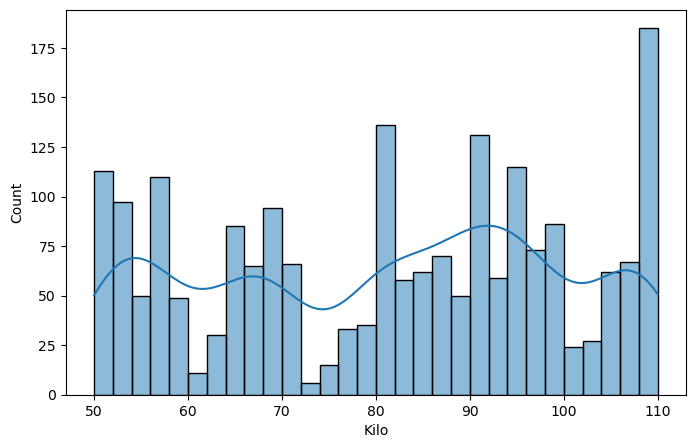

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(data['Kilo'], kde=True, bins=30)

In [75]:
from scipy.stats import shapiro

stat, p_value = shapiro(data['Kilo'].dropna())
print('Shapiro-Wilk Testi İstatistiği=%.3f, p-değeri=%.3f' % (stat, p_value))
if p_value > 0.05:
    print("Kilo değişkeni normal dağılıyor (p > 0.05)")
else:
    print("Kilo değişkeni normal dağılmıyor (p <= 0.05)")

Shapiro-Wilk Testi İstatistiği=0.939, p-değeri=0.000
Kilo değişkeni normal dağılmıyor (p <= 0.05)


Kilo değişkeni normal dağılmadığı için eksik gözlemlere ortalama değeri ataması yapamayız.


In [85]:
import pandas as pd
from sklearn.impute import KNNImputer
numeric_data = data[["Kilo", "Boy"]]
imputer = KNNImputer(n_neighbors=5)
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)
data["Kilo"] = numeric_data_imputed["Kilo"]
data["Kilo"].head()

0    103.0
1     81.0
2     93.0
3     96.2
4     99.0
Name: Kilo, dtype: float64

Kilo değişkenindeki eksik verileri K-En yakın komşu algoritmasını kullanarak doldurduk.

In [93]:
stat, p_value = shapiro(data['Boy'].dropna())
print('Shapiro-Wilk Testi İstatistiği=%.3f, p-değeri=%.3f' % (stat, p_value))
if p_value > 0.05:
    print("Boy değişkeni normal dağılıyor (p > 0.05)")
else:
    print("Boy değişkeni normal dağılmıyor (p <= 0.05)")

Shapiro-Wilk Testi İstatistiği=0.960, p-değeri=0.000
Boy değişkeni normal dağılmıyor (p <= 0.05)


Boy değişkeni de normal dağılmadığı için değişkendeki eksik verileri yine k en yakın komşu algoritmasını kullanarak doldurmamız gerekir.

In [89]:
numeric_data = data[["Kilo", "Boy"]]
imputer = KNNImputer(n_neighbors=5)
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)
data["Boy"] = numeric_data_imputed["Boy"]
data["Boy"].head()

0    191.0
1    181.0
2    158.0
3    165.0
4    172.0
Name: Boy, dtype: float64

In [112]:
categorical_columns = data[['Cinsiyet', 'Kan Grubu', 'Il']]
for column in categorical_columns:
    mode_value = data[column].mode()[0]  
    data[column].fillna(mode_value, inplace=True)
 

In [115]:
data.isnull().sum()

Kullanici_id                        0
Cinsiyet                            0
Dogum_Tarihi                        0
Uyruk                               0
Il                                  0
Ilac_Adi                            0
Ilac_Baslangic_Tarihi               0
Ilac_Bitis_Tarihi                   0
Yan_Etki                            0
Yan_Etki_Bildirim_Tarihi            0
Alerjilerim                         0
Kronik Hastaliklarim                0
Baba Kronik Hastaliklari            0
Anne Kronik Hastaliklari            0
Kiz Kardes Kronik Hastaliklari      0
Erkek Kardes Kronik Hastaliklari    0
Kan Grubu                           0
Kilo                                0
Boy                                 0
dtype: int64

In [100]:
Kategorik değişkenlerdeki eksik verileri de değişkenlerin modlarıyla doldurduk.

0       Canakkale
1         Trabzon
2       Canakkale
3           Adana
4           Izmir
          ...    
2352        Adana
2353       Mersin
2354       Mersin
2355      Kayseri
2356     Istanbul
Name: Il, Length: 2357, dtype: object

In [119]:
print(data['Cinsiyet'].value_counts())
print(data['Uyruk'].value_counts())
print(data['Alerjilerim'].value_counts())
print(data['Kan Grubu'].value_counts())

Cinsiyet
Female    1650
Male       707
Name: count, dtype: int64
Uyruk
Turkiye    2357
Name: count, dtype: int64
Alerjilerim
0                  484
Domates            118
Karaciger          109
Pancar             100
Balik               98
Havyar              97
Ispanakgiller       95
Kefir               91
Kopek               91
Yogurt              89
Deniz Urunler       87
Muz                 81
Kabak Cekirdegi     77
Kahve               76
Sari Kantaron       75
Toz                 70
Laktoz              60
Bugday              55
Cikolata            53
Elma                53
Ispanak             48
Istiridye           46
Bal                 43
Kedi                38
Lateks              32
Ceviz               30
Sut                 27
Kakao               22
Kolali Icecek       12
Name: count, dtype: int64
Kan Grubu
AB RH-    768
0 RH+     275
B RH+     256
AB RH+    250
B RH-     233
0 RH-     232
A RH+     198
A RH-     145
Name: count, dtype: int64


Kategorik değişkenlerimize ait veri sayılarını da kategori bazlı görmüş olduk.

In [121]:
print(data[['Kilo', 'Boy']].describe())

              Kilo          Boy
count  2357.000000  2357.000000
mean     80.849385   174.643360
std      17.796492    16.431335
min      50.000000   145.000000
25%      67.000000   160.000000
50%      82.000000   176.000000
75%      94.000000   187.000000
max     110.000000   203.000000


array([[<Axes: title={'center': 'Kilo'}>,
        <Axes: title={'center': 'Boy'}>]], dtype=object)

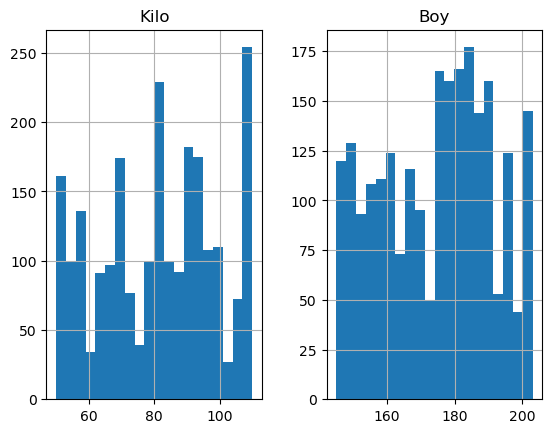

In [123]:
data[['Kilo', 'Boy']].hist(bins=20)

In [125]:
data['Ilac_Suresi'] = (data['Ilac_Bitis_Tarihi'] - data['Ilac_Baslangic_Tarihi']).dt.days
print(data['Ilac_Suresi'].describe())

count    2357.000000
mean       62.234620
std         6.576611
min        47.000000
25%        58.000000
50%        62.000000
75%        67.000000
max        77.000000
Name: Ilac_Suresi, dtype: float64


İlaç kullanma sürelerine bakıldığında ortalama olarak 62 gün kullanıldığı söylenebilir.

In [144]:
Q1= data["Boy"].quantile(0.25)
Q3= data["Boy"].quantile(0.75)
IQR= Q3-Q1
alt_sinir= Q1-1.5*IQR
ust_sinir= Q3+1.5*IQR
print(alt_sinir)
print(ust_sinir)

119.5
227.5


<Axes: xlabel='Boy'>

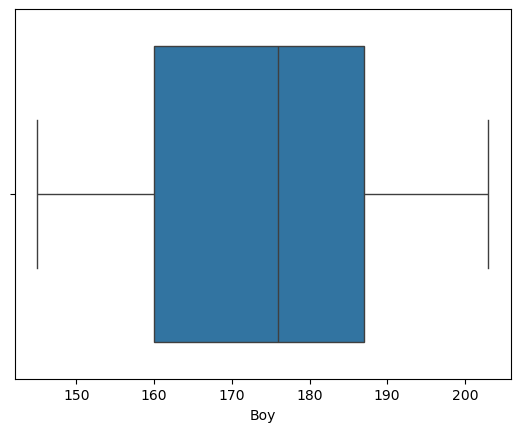

In [154]:
sns.boxplot(x=(data["Boy"]))

Boxplot grafiğine baktığımızda Boy değişkeninde aykırı değer olmadığını görüyoruz.

<Axes: xlabel='Kilo'>

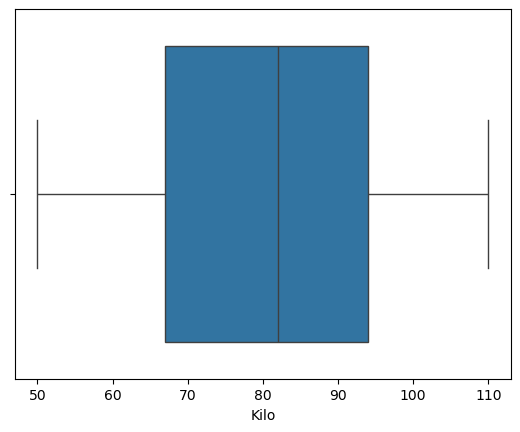

In [160]:
sns.boxplot(x=(data["Kilo"]))

Kilo değişkeninde de aykırı gözlem yoktur yorumu yapılabilir.

In [163]:
print(data[['Kilo', 'Boy']].corr())

          Kilo       Boy
Kilo  1.000000 -0.173339
Boy  -0.173339  1.000000


Kilo ve boy arasındaki korelasyona baktığımızda -0.173 yani negatif yönde zayıf birilişki olduğu söylenebilir.

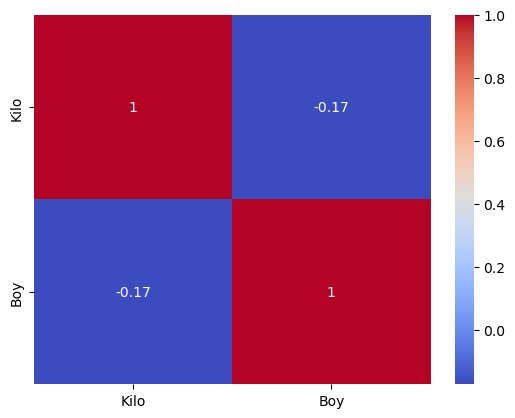

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data[['Kilo', 'Boy']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [169]:
data.groupby('Cinsiyet')['Kilo'].mean()

Cinsiyet
Female    79.875152
Male      83.123055
Name: Kilo, dtype: float64

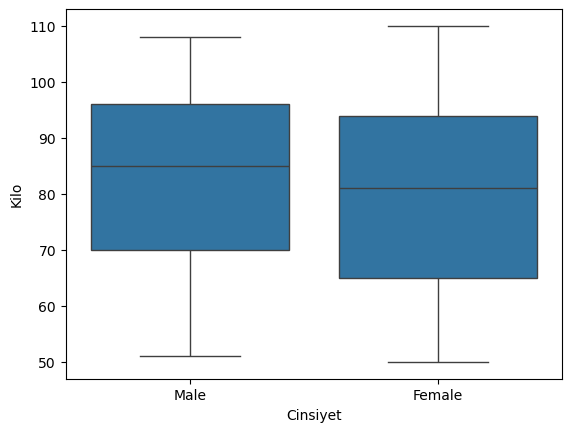

In [171]:
sns.boxplot(x='Cinsiyet', y='Kilo', data=data)
plt.show()

Cinsiyet ve kilo değişkeni arasındaki ilişkiye bakıldığında ortalama olarak kadınların kilosunun erkeklerden daha az olduğu söylenebilir. 

In [180]:
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame(data)
le = LabelEncoder()
df['cinsiyet_encoded'] = le.fit_transform(data['Cinsiyet'])
print(df)

      Kullanici_id Cinsiyet Dogum_Tarihi    Uyruk         Il  \
0              107     Male   1960-03-01  Turkiye  Canakkale   
1              140     Male   1939-10-12  Turkiye    Trabzon   
2                2   Female   1976-12-17  Turkiye  Canakkale   
3               83     Male   1977-06-17  Turkiye      Adana   
4                7   Female   1976-09-03  Turkiye      Izmir   
...            ...      ...          ...      ...        ...   
2352             9   Female   1957-01-04  Turkiye      Adana   
2353           101   Female   2004-11-09  Turkiye     Mersin   
2354           127   Female   1951-11-29  Turkiye     Mersin   
2355           178     Male   1980-01-30  Turkiye    Kayseri   
2356           174   Female   1986-11-07  Turkiye   Istanbul   

                               Ilac_Adi Ilac_Baslangic_Tarihi  \
0                       trifluoperazine            2022-01-09   
1                      fluphenazine hcl            2022-01-09   
2                       warfarin sod

Cinsiyet kategorik değişkenini LabelEncoder algoritması kullanarak sayısal değişkene dönüştürdük.

C:\Users\senay\AppData\Local\Temp\ipykernel_8228\570410678.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((data["Ilac_Suresi"]), hist=False)


<Axes: xlabel='Ilac_Suresi', ylabel='Density'>

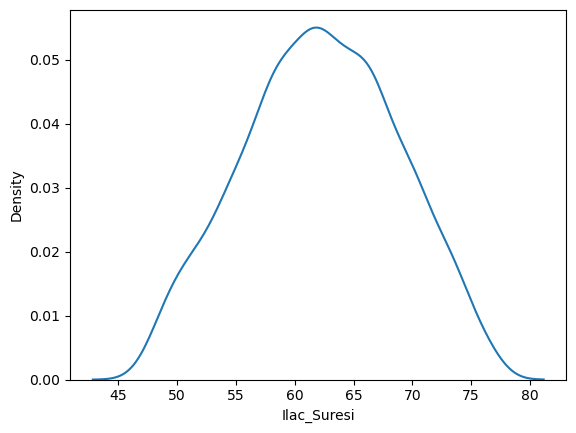

In [202]:
sns.distplot((data["Ilac_Suresi"]), hist=False)


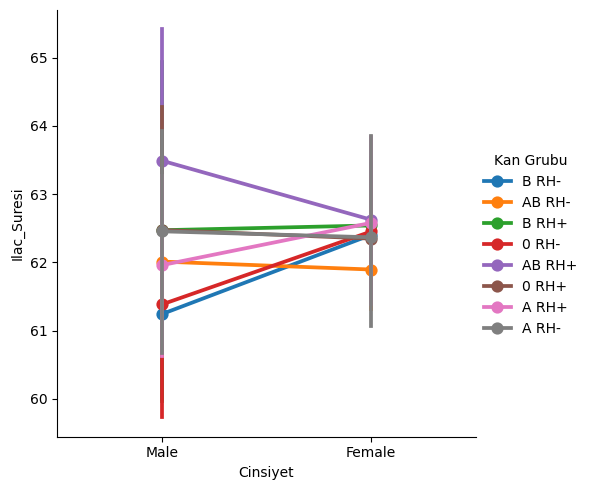

In [204]:
sns.catplot(x="Cinsiyet", y="Ilac_S", hue="Kan Grubu", kind="point", data=data);

Cinsiyet ve kan grubuna bağlı ilaç kullanma süresine baktığımızda erkekler arasında daha büyük değişkenlik gösterdiği yorumunu yapabiliriz.